In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
df = pd.read_csv('./data/iris.data.txt', header=None, names=cols)
print(df['flower'].unique())
df.head()
df.shape

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


(150, 5)

In [6]:
flower_mapping = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
df['flower'] = df['flower'].apply(lambda x: flower_mapping[x])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


50


Text(0, 0.5, 'Petal Width')

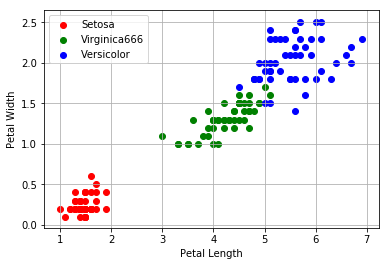

In [7]:
iris_setosa = df[df['flower'] == 0]
iris_virginica = df[df['flower'] == 1]
iris_versicolor = df[df['flower'] == 2]
print(len(iris_setosa))

plt.scatter(iris_setosa['petal_length'], iris_setosa['petal_width'], color='r', label='Setosa')
plt.scatter(iris_virginica['petal_length'], iris_virginica['petal_width'], color='g', label='Virginica666')
plt.scatter(iris_versicolor['petal_length'], iris_versicolor['petal_width'], color='b', label='Versicolor')
plt.legend()
plt.grid()
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

     petal_length  petal_width
52            4.9          1.5
85            4.5          1.6
127           4.9          1.8
7             1.5          0.2
60            3.5          1.0
89            4.0          1.3
129           5.8          1.6
105           6.6          2.1
123           4.9          1.8
138           4.8          1.8
61            4.2          1.5
125           6.0          1.8
11            1.6          0.2
21            1.5          0.4
4             1.4          0.2
8             1.4          0.2
53            4.0          1.3
110           5.1          2.0
81            3.7          1.0
134           5.6          1.4
2             1.3          0.2
96            4.2          1.3
101           5.1          1.9
0             1.4          0.2
144           5.7          2.5
121           4.9          2.0
72            4.9          1.5
6             1.4          0.3
88            4.1          1.3
107           6.3          1.8


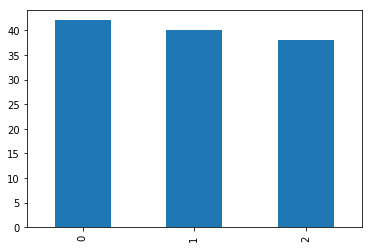

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[['petal_length', 'petal_width']], df['flower'], test_size=0.2)
y_train.value_counts().plot(kind='bar')
print (X_test)


## For max depth 2

In [9]:
decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
obtained_tree = decisiontree.fit(X_train, y_train)

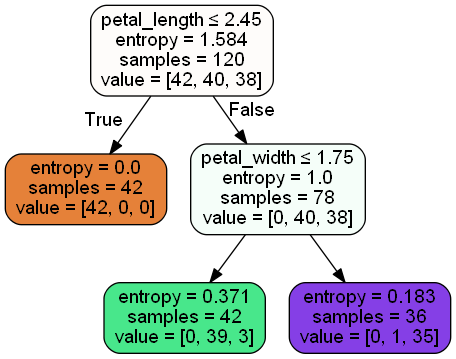

In [13]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import Image 

DecisionTree = StringIO()
export_graphviz(obtained_tree, out_file=DecisionTree,  
                filled=True, rounded=True, feature_names=cols[2:-1],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(DecisionTree.getvalue())  
Image(graph.create_png())

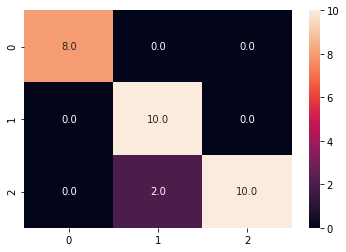

In [14]:
import seaborn as sb
obtained_y = obtained_tree.predict(X_test)
sb.heatmap(confusion_matrix(y_test, obtained_y), annot=True, fmt='.1f')

In [15]:
obtained_tree.predict([[0,0]]) 

array([0], dtype=int64)

## For max depth 3

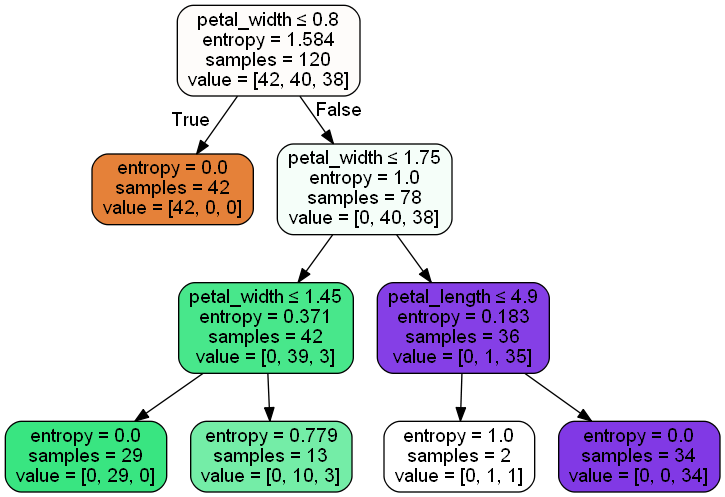

In [16]:
decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
obtained_tree = decisiontree.fit(X_train, y_train)

DecisionTree = StringIO()
export_graphviz(obtained_tree, out_file=DecisionTree,  
                filled=True, rounded=True, feature_names=cols[2:-1],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(DecisionTree.getvalue())  
Image(graph.create_png())

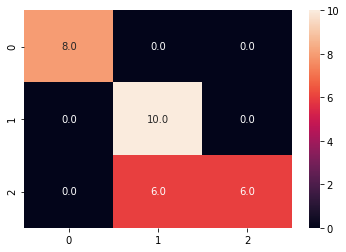

In [17]:
obtained_y = obtained_tree.predict(X_test)

sb.heatmap(confusion_matrix(y_test, obtained_y), annot=True, fmt='.1f')

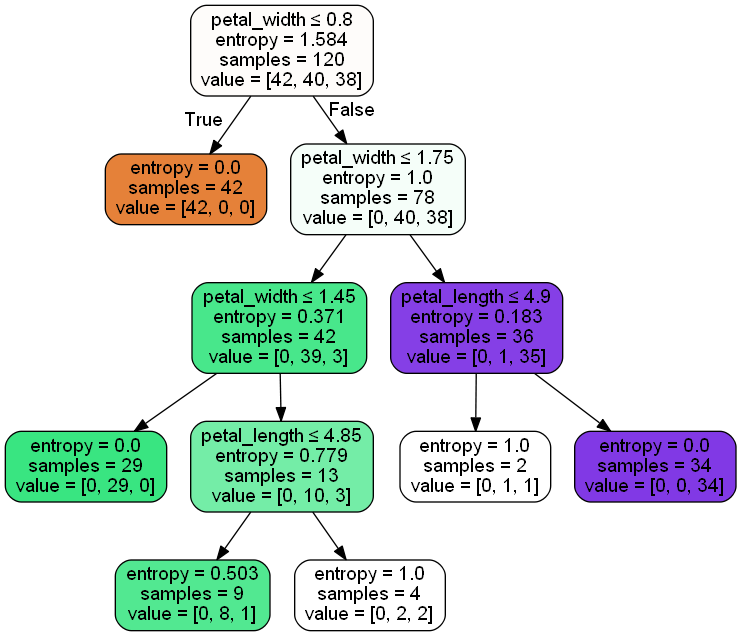

In [18]:
decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
obtained_tree = decisiontree.fit(X_train, y_train)

DecisionTree = StringIO()
export_graphviz(obtained_tree, out_file=DecisionTree,  
                filled=True, rounded=True, feature_names=cols[2:-1],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(DecisionTree.getvalue())  
Image(graph.create_png())

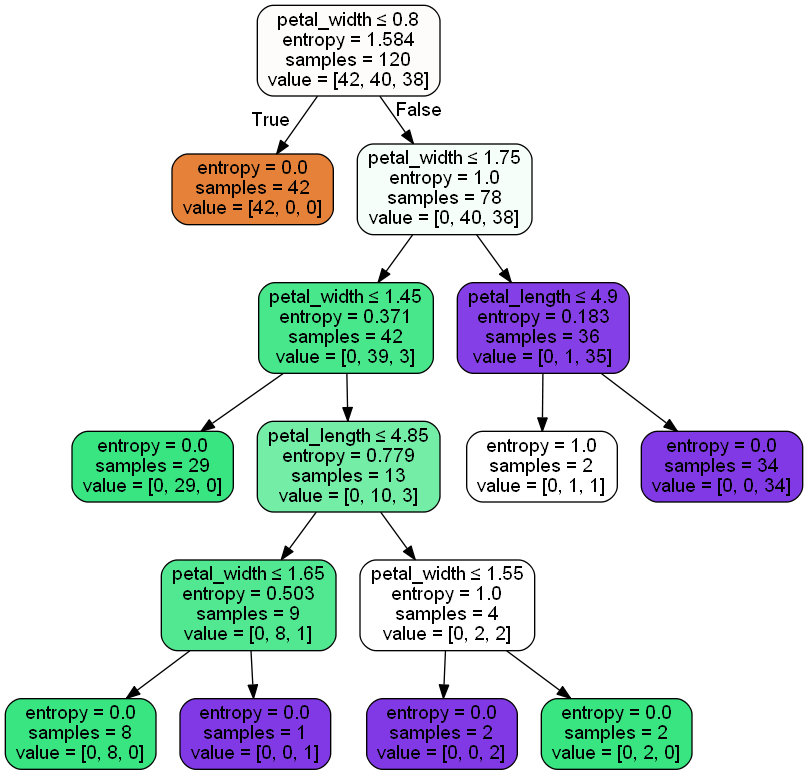

In [19]:
decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
obtained_tree = decisiontree.fit(X_train, y_train)

DecisionTree = StringIO()
export_graphviz(obtained_tree, out_file=DecisionTree,  
                filled=True, rounded=True, feature_names=cols[2:-1],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(DecisionTree.getvalue())  
Image(graph.create_png())

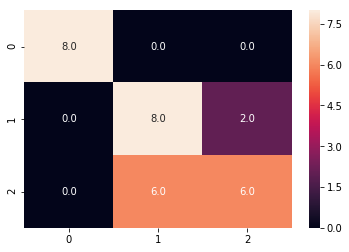

In [20]:
obtained_y = obtained_tree.predict(X_test)
sb.heatmap(confusion_matrix(y_test, obtained_y), annot=True, fmt='.1f')